## Day 35 Lecture 1 Assignment

In this assignment, we will learn about gradient boosting. We will use a dataset describing survival rates after breast cancer surgery loaded below and analyze the model generated for this dataset.

In [18]:
! pip install scikit-optimize

     |████████████████████████████████| 102kB 2.3MB/s 


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Attributes:
# Age of patient at time of operation (numerical)
# Patient's year of operation (year - 1900, numerical)
# Number of positive axillary nodes detected (numerical)
# Survival status (class attribute)
#  -- 1 = the patient survived 5 years or longer
#  -- 2 = the patient died within 5 year

cols = ['age', 'op_year', 'nodes', 'survival']
cancer = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/haberman.data', names=cols)

In [3]:
print(cancer.shape)
cancer.head(10)

(306, 4)


,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,2
8,34,66,9,2
9,34,58,30,1


Check for missing data and remove all rows containing missing data

In [4]:
# answer below:
#checking on nulls
cancer.isnull().mean().sort_values(ascending=False)

#no nulls 

survival    0.0
nodes       0.0
op_year     0.0
age         0.0
dtype: float64

In [5]:
#looking at dtypes
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       306 non-null    int64
 1   op_year   306 non-null    int64
 2   nodes     306 non-null    int64
 3   survival  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


Adjust the target variable so that it has values of either 0 or 1

In [6]:
# answer below:
#changing survival = 2 to 0 -- died within 5 years
#survival = 1 stay at 1 -- survived 5 years or longer
cancer['survival'] = cancer['survival'].apply(lambda x: 0 if x == 2 else 1)
cancer.head(10)

,age,op_year,nodes,survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
5,33,58,10,1
6,33,60,0,1
7,34,59,0,0
8,34,66,9,0
9,34,58,30,1


Split the data into train and test (20% in test)

In [7]:
cancer['survival'].value_counts()

1    225
0     81
Name: survival, dtype: int64

In [8]:
# answer below:
from sklearn.model_selection import train_test_split
X = cancer.drop(['survival'], axis=1)
y = cancer['survival']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Create a gradient boosted classification algorithm with a learning rate of 0.01 and max depth of 5. Report the accuracy.

In [9]:
# answer below:
from sklearn.ensemble import GradientBoostingClassifier

grad = GradientBoostingClassifier(learning_rate=0.01, max_depth=5)
grad.fit(X_train, y_train)

print('Train Mean Accuracy:', grad.score(X_train, y_train))
print('Test Mean Accuracy:', grad.score(X_test, y_test))

Train Mean Accuracy: 0.8442622950819673
Test Mean Accuracy: 0.7903225806451613


Print the confusion matrix for the test data. What do you notice about our predictions?

In [10]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

#function for confusion matrix
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')
  
  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  
  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
      plt.text(j, i, '{:0.4f}'.format(cm[i, j]),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')
    else:
      plt.text(j, i, '{:,}'.format(cm[i, j]),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

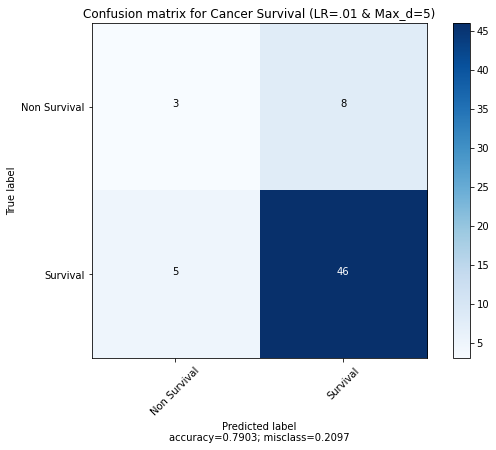

In [11]:
# answer below:
#cm for test data
y_test_pred = grad.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, target_names=['Non Survival', 'Survival'], 
                      title='Confusion matrix for Cancer Survival (LR=.01 & Max_d=5)', normalize=False)

Based off the Confusion matrix, the model is preforming well on predicting those who survived, but not on the Non-survivors. There are slightly more false negatives than there are true negatives. 

Print the confusion matrix for a learning rate of 1 and a learning rate of 0.5. What do you see now that stands out to you in the confusion matrix?

In [12]:
# answer below:
grad_1 = GradientBoostingClassifier(learning_rate=1.0, max_depth=5)
grad_1.fit(X_train, y_train)
print('Train Mean Accuracy (LR=1):', grad_1.score(X_train, y_train))
print('Test Mean Accuracy (LR=1):', grad_1.score(X_test, y_test))

grad_05 = GradientBoostingClassifier(learning_rate=0.5, max_depth=5)
grad_05.fit(X_train, y_train)
print('\nTrain Mean Accuracy (LR=0.5):', grad_05.score(X_train, y_train))
print('Test Mean Accuracy (LR=0.5):', grad_05.score(X_test, y_test))

Train Mean Accuracy (LR=1): 0.9795081967213115
Test Mean Accuracy (LR=1): 0.6774193548387096

Train Mean Accuracy (LR=0.5): 0.9795081967213115
Test Mean Accuracy (LR=0.5): 0.7258064516129032


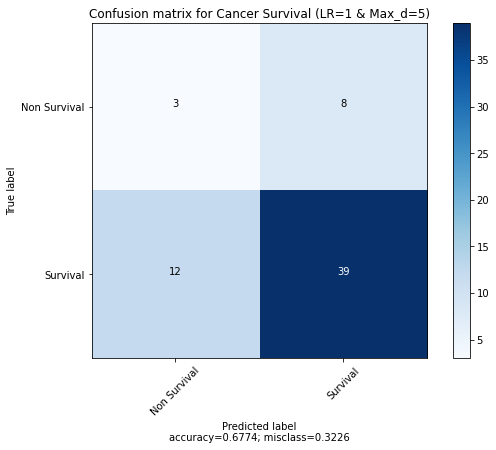

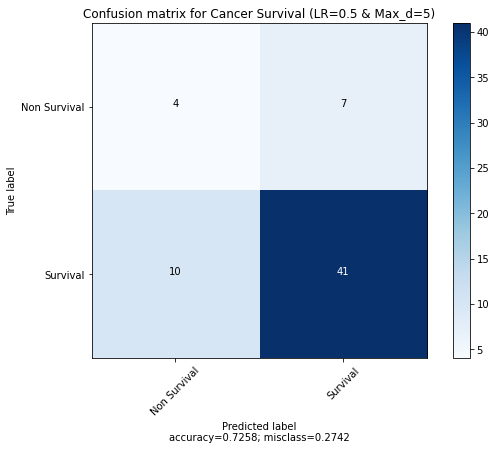

In [15]:
#CM of LR=1 and LR=0.5
y_test_pred1 = grad_1.predict(X_test)
cm_1 = confusion_matrix(y_test, y_test_pred1)
plot_confusion_matrix(cm_1, target_names=['Non Survival', 'Survival'], 
                      title='Confusion matrix for Cancer Survival (LR=1 & Max_d=5)', normalize=False)

y_test_pred2 = grad_05.predict(X_test)
cm_05 = confusion_matrix(y_test, y_test_pred2)
plot_confusion_matrix(cm_05, target_names=['Non Survival', 'Survival'], 
                      title='Confusion matrix for Cancer Survival (LR=0.5 & Max_d=5)', normalize=False)

Comparing the above two Confusion Matrices it seems that the false negatives and false positives decreased as the LR changed from 1 to 0.5 and the true negatives/positives went slightly down. 

It is also important to note that the class imbalance is shown clearly between all the matrices. 

Perform a grid search for the optimal learning rate. Instead of accuracy, use a metric that will help your model predict the positive class.

In [16]:
# answer below:
from sklearn.model_selection import GridSearchCV
#grid search for LR
#metric for positive class = 'recall'
params = {'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.4, 0.6]}
gbc = GradientBoostingClassifier(max_depth=5)
gbc_grid = GridSearchCV(gbc, param_grid=params, scoring='recall', cv=5)
gbc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=5,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats

#randomized search for LR
#scoring = 'recall'

parameters = {'learning_rate': stats.uniform(0.1, 0.9)}

gbc_random = RandomizedSearchCV(gbc, parameters, scoring='recall', cv=5)
gbc_random.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=5,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [19]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

#bayes search for LR

param = {'learning_rate': Real(0.1, 0.9)}

gbc_bayes = BayesSearchCV(gbc, param, scoring='recall', cv=5)
gbc_bayes.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.6/dist-packa

BayesSearchCV(cv=5, error_score='raise',
              estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                   criterion='friedman_mse',
                                                   init=None, learning_rate=0.1,
                                                   loss='deviance', max_depth=5,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_iter...
    

List the feature importances for the model with the optimal learning rate.

In [20]:
# answer below:
#function to illustrate best results
from sklearn.metrics import classification_report
def search_results(grid):
    print('LR:', grid.best_estimator_.learning_rate,  
          '| trees:', grid.best_estimator_.n_estimators_)
    y_pred = grid.predict(X_test)
    print(classification_report(y_test, y_pred))
    display(pd.crosstab(y_test, y_pred))

*GridSearchCV results*

In [21]:
#classification report for GridSearchCV
search_results(gbc_grid)

LR: 0.01 | trees: 100
              precision    recall  f1-score   support

           0       0.38      0.27      0.32        11
           1       0.85      0.90      0.88        51

    accuracy                           0.79        62
   macro avg       0.61      0.59      0.60        62
weighted avg       0.77      0.79      0.78        62



col_0,0,1
survival,,
0,3,8
1,5,46


In [23]:
#feature importances for GridSearchCV
x_cols = X_train.columns

pd.DataFrame({'columns': x_cols, 'importance scores':gbc_grid.best_estimator_.feature_importances_}).sort_values(
    by='importance scores', ascending=False)

,columns,importance scores
2,nodes,0.487427
0,age,0.278016
1,op_year,0.234557


*RandomizedSearchCV results*

In [24]:
#classification report for RandomizedSearchCV
search_results(gbc_random)

LR: 0.16151625352275972 | trees: 100
              precision    recall  f1-score   support

           0       0.27      0.27      0.27        11
           1       0.84      0.84      0.84        51

    accuracy                           0.74        62
   macro avg       0.56      0.56      0.56        62
weighted avg       0.74      0.74      0.74        62



col_0,0,1
survival,,
0,3,8
1,8,43


In [25]:
#feature importances for RandomizedSearchCV
x_cols = X_train.columns

pd.DataFrame({'columns': x_cols, 'importance scores':gbc_random.best_estimator_.feature_importances_}).sort_values(
    by='importance scores', ascending=False)

,columns,importance scores
2,nodes,0.357169
0,age,0.355527
1,op_year,0.287304


*BayesSearchCV results*

In [26]:
#classification report for BayesSearchCV
search_results(gbc_bayes)

LR: 0.10006379167900148 | trees: 100
              precision    recall  f1-score   support

           0       0.27      0.27      0.27        11
           1       0.84      0.84      0.84        51

    accuracy                           0.74        62
   macro avg       0.56      0.56      0.56        62
weighted avg       0.74      0.74      0.74        62



col_0,0,1
survival,,
0,3,8
1,8,43


In [27]:
#feature importances for BayesSearchCV
x_cols = X_train.columns

pd.DataFrame({'columns': x_cols, 'importance scores':gbc_bayes.best_estimator_.feature_importances_}).sort_values(
    by='importance scores', ascending=False)

,columns,importance scores
0,age,0.379428
2,nodes,0.319731
1,op_year,0.300841


In [ ]:
#the best recall score for the positive class came from the GridSearchCV with 0.90 score 
#it had the optimal learning_rate of 0.01

#the other two CV's recall score for the positive class was 0.84